# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## background

(Please insert the background here )

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [8]:
import requests

url = 'https://www.coingecko.com/en/coins/ethereum/historical_data/?start_date=2020-01-01&end_date=2021-06-30'; 
url_get = requests.get(url, 
                      headers = {
        'User-Agent': 'Popular browser\'s user-agent',
    })
##url_get = requests.get('https://www.coingecko.com/en/coins/ethereum/historical_data/usd?start_date=2020-01-01&end_date=2021-06-30#panel')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [9]:
url_get.content[1:500]

b'!DOCTYPE html>\n<html lang="en">\n<head>\n<script src="/cdn-cgi/apps/head/gYtXOyllgyP3-Z2iKTP8rRWGBm4.js"></script><script async defer src="https://www.googleoptimize.com/optimize.js?id=GTM-W3CD992"></script>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<script>window.NREUM||(NREUM={});NREUM.info={"beacon":"bam.nr-data.net","errorBeacon":"bam.nr-data.net","licenseKey":"cd4a6493ab","applicationID":"83495717","transactionName":"dV5dRBNcDlkEEU5SDF9fQB8JWhFBDhEIUgJabldR'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [4]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
soup

<!DOCTYPE html>

<html lang="en">
<head>
<script src="/cdn-cgi/apps/head/gYtXOyllgyP3-Z2iKTP8rRWGBm4.js"></script><script async="" defer="" src="https://www.googleoptimize.com/optimize.js?id=GTM-W3CD992"></script>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<link href="/favicon.ico" rel="shortcut icon"/>
<link href="/OpensearchDescription.xml" rel="search" type="application/opensearchdescription+xml">
<title>Ethereum USD Historical Data | CoinGecko</title>
<meta content="Get Ethereum (ETH) USD historical prices." name="description">
<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
  new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
  j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
  'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);
  })(window,document,'script','dataLayer','GTM-NP34MX7

## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [5]:
table = soup.find('table',class_='table table-striped text-sm text-lg-normal')
table

<table class="table table-striped text-sm text-lg-normal">
<thead>
<tr>
<th class="text-center">Date</th>
<th class="text-center">Market Cap</th>
<th class="text-center">Volume</th>
<th class="text-center">Open</th>
<th class="text-center">Close</th>
</tr>
</thead>
<tbody>
<tr>
<th class="font-semibold text-center" scope="row">2021-06-30</th>
<td class="text-center">
$253,607,549,372
</td>
<td class="text-center">
$27,149,143,847
</td>
<td class="text-center">
$2,169.40
</td>
<td class="text-center">
N/A
</td>
</tr>
<tr>
<th class="font-semibold text-center" scope="row">2021-06-29</th>
<td class="text-center">
$243,040,539,437
</td>
<td class="text-center">
$30,629,329,806
</td>
<td class="text-center">
$2,087.52
</td>
<td class="text-center">
$2,169.40
</td>
</tr>
<tr>
<th class="font-semibold text-center" scope="row">2021-06-28</th>
<td class="text-center">
$229,354,016,311
</td>
<td class="text-center">
$24,316,408,028
</td>
<td class="text-center">
$1,973.93
</td>
<td class="text-c

In [5]:
print(table.prettify()[1:500])

table class="table table-striped text-sm text-lg-normal">
 <thead>
  <tr>
   <th class="text-center">
    Date
   </th>
   <th class="text-center">
    Market Cap
   </th>
   <th class="text-center">
    Volume
   </th>
   <th class="text-center">
    Open
   </th>
   <th class="text-center">
    Close
   </th>
  </tr>
 </thead>
 <tbody>
  <tr>
   <th class="font-semibold text-center" scope="row">
    2021-06-30
   </th>
   <td class="text-center">
    $253,607,549,372
   </td>
   <td class="te


Finding row length.

In [6]:
row_length = len(table)
row_length

5

In [7]:
len(table.find_all('tr'))

61

Do the scrapping process here (please change this markdown with your explanation)

In [10]:
import pandas as pd
df = pd.DataFrame(columns=['Date','Market Cap','Volume','Open','Close'])

# Collecting Ddata
for row in table.tbody.find_all('tr'):    
    # Find all data for each column
    date=row.find_all('th')
    columns = row.find_all('td')
    if(columns != []):
        date_1 = date[0].text.strip()
        market_cap = columns[0].text.strip()
        volume = columns[1].text.strip()
        open_ = columns[2].text.strip()
        close = columns[3].text.strip()


        df = df.append({'Date': date_1,  'Market Cap': market_cap, 'Volume': volume, 'Open': open_, 'Close': close}, ignore_index=True)

## Creating data frame & Data wrangling

Put the array into dataframe

In [11]:
df

,Date,Market Cap,Volume,Open,Close
0,2021-06-30,"$253,607,549,372","$27,149,143,847","$2,169.40",N/A
1,2021-06-29,"$243,040,539,437","$30,629,329,806","$2,087.52","$2,169.40"
2,2021-06-28,"$229,354,016,311","$24,316,408,028","$1,973.93","$2,087.52"
3,2021-06-27,"$209,989,265,221","$24,249,510,321","$1,817.05","$1,973.93"
4,2021-06-26,"$213,871,849,532","$25,981,381,067","$1,833.46","$1,817.05"
5,2021-06-25,"$231,644,258,719","$22,447,489,242","$1,990.08","$1,833.46"
6,2021-06-24,"$229,518,675,837","$28,098,744,045","$1,971.11","$1,990.08"
7,2021-06-23,"$216,876,757,209","$38,755,019,937","$1,875.36","$1,971.11"
8,2021-06-22,"$223,202,708,789","$39,499,960,408","$1,900.12","$1,875.36"
9,2021-06-21,"$261,478,202,409","$26,235,850,447","$2,251.56","$1,900.12"


In [12]:
df['Date'] = df['Date'].astype('datetime64')
df['Volume'] = df['Volume'].str.replace('$','',regex=False)
df['Volume'] = df['Volume'].str.replace(',','')
df['Volume'] = df['Volume'].astype('float64')
df['Volume'] = df['Volume']/1000000000
df = df.set_index(df['Date'])
df_1 = df['Volume']

Do the data cleaning here (please change this markdown with your explanation of what you do for data wrangling)

Data visualisation (please change this markdown with your explanation of what you do for data wrangling)

In [13]:
df_1

Date
2021-06-30     27.149144
2021-06-29     30.629330
2021-06-28     24.316408
2021-06-27     24.249510
2021-06-26     25.981381
2021-06-25     22.447489
2021-06-24     28.098744
2021-06-23     38.755020
2021-06-22     39.499960
2021-06-21     26.235850
2021-06-20     20.456963
2021-06-19     26.204485
2021-06-18     25.708625
2021-06-17     26.150320
2021-06-16     26.803958
2021-06-15     28.128172
2021-06-14     29.382119
2021-06-13     28.235882
2021-06-12     26.751787
2021-06-11     33.075957
2021-06-10     43.973432
2021-06-09     48.344196
2021-06-08     37.385872
2021-06-07     29.050162
2021-06-06     34.731980
2021-06-05     39.996583
2021-06-04     38.104663
2021-06-03     39.148857
2021-06-02     39.898649
2021-06-01     44.445830
2021-05-31     37.392021
2021-05-30     47.141249
2021-05-29     49.493519
2021-05-28     44.070236
2021-05-27     53.115223
2021-05-26     92.468701
2021-05-25     73.496059
2021-05-24     77.839859
2021-05-23    102.524752
2021-05-22    115.00

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

<AxesSubplot:xlabel='Date'>

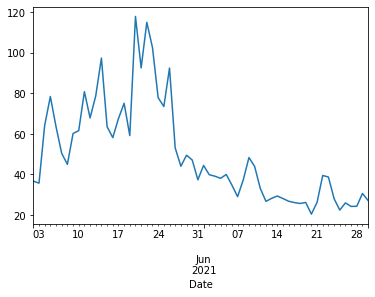

In [14]:
df_1.plot()

Analysis:
Ethereum transaction volume has increased since the beginning of June 2021 until its peak around June 20, 2021. After that Ethereum transaction volume began to experience a fairly drastic decline.

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.